<a href="https://colab.research.google.com/github/saurabhthesuperhero/Convolutional-Neural-Networks-in-TensorFlow/blob/master/Exercise_8_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saurabhthesuperhero","key":"ba8d68ec9c04f7d2c30d9ab2f9b16197"}'}

In [0]:


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [0]:
!kaggle datasets download -d datamunge/sign-language-mnist

 88% 55.0M/62.6M [00:01<00:00, 26.6MB/s]
100% 62.6M/62.6M [00:01<00:00, 40.6MB/s]


In [0]:
!ls


kaggle.json  sample_data  sign-language-mnist.zip  sign_mnist_train.csv


In [0]:


import zipfile
zip_ref = zipfile.ZipFile('sign-language-mnist.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()



In [0]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      reader=csv.reader(training_file,delimiter=',')
      imgs=[]
      labls=[]
      next(reader, None)

      for i in reader:
        label=i[0]
        img=i[1:]
        img=np.array(img).reshape((28,28))

        imgs.append(img)
        labls.append(label)
      # Your code ends here
      images=np.array(imgs).astype(float)
      labels=np.array(labls).astype(float)
    return images, labels


training_images, training_labels = get_data('/content/files/sign_mnist_train/sign_mnist_train.csv')
testing_images, testing_labels = get_data('/content/files/sign_mnist_test/sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis=3)
testing_images =np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale=1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(26,activation='softmax')
]

    )

# Compile Model. 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=20
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=20
)

# Train the Model
history = model.fit(train_gen,
    epochs=15,
    validation_data=val_gen)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/15
1373/1373 [==============================] - 10s 7ms/step - loss: 2.5750 - accuracy: 0.2066 - val_loss: 1.6166 - val_accuracy: 0.4711
Epoch 2/15
1373/1373 [==============================] - 10s 7ms/step - loss: 1.7260 - accuracy: 0.4436 - val_loss: 1.0642 - val_accuracy: 0.6458
Epoch 3/15
1373/1373 [==============================] - 10s 7ms/step - loss: 1.3019 - accuracy: 0.5760 - val_loss: 0.8983 - val_accuracy: 0.7015
Epoch 4/15
1373/1373 [==============================] - 10s 7ms/step - loss: 1.0639 - accuracy: 0.6460 - val_loss: 0.6933 - val_accuracy: 0.7766
Epoch 5/15
1373/1373 [==============================] - 10s 7ms/step - loss: 0.9018 - accuracy: 0.6996 - val_loss: 0.4822 - val_accuracy: 0.8461
Epoch 6/15
1373/1373 [==============================] - 10s 7ms/step - loss: 0.7909 - accuracy: 0.7352 - val_loss: 0.3597 - val_accuracy: 0.8741
Epoch 7/15
1373/1373 [==============================] - 10s 7ms/step - loss: 0.7012 - accuracy: 0.7669 - val_loss: 0.4104 - val_ac

[6.92426086682151, 0.56609035]

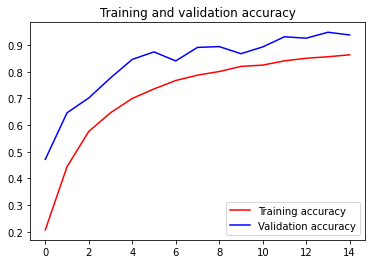

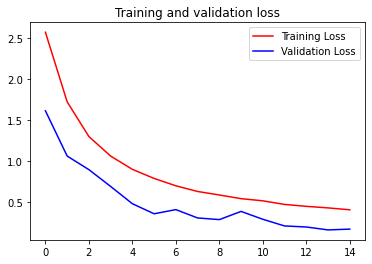

In [0]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss =  history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()